In [28]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('station_weather_data.csv')
df = df.drop(['PRCP_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES'],axis=1)
df = df.fillna(0)
df

STATION                NAME  LATITUDE  LONGITUDE  ELEVATION  \
0      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
1      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
2      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
3      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
4      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
...            ...                 ...       ...        ...        ...   
12439  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12440  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12441  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12442  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12443  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   

             DATE  PRCP  TAVG  TMAX  TMIN  
0      2022-07-01   0.0   8.8  16.0  -1.7  
1      2022-07-02   0.0  11.1  17.4   3.5  
2      2022-07-03   0.0  11.6  18.3   6.8  
3      2022-07-04   0.0   9.3  19.0   0.8  
4      2022-07-05   0.0  10.4  19.0   7.3  
...           ...   ...   ...   ...   ...  
12439  2023-04-08   0.0  14.2  21.0  12.2  
12440  2023-04-09   0.0  14.3  18.5  11.1  
12441  2023-04-10   0.0  14.9  18.7  12.5  
12442  2023-04-11   0.0  14.6  18.7  11.1  
12443  2023-04-12   0.0  14.8  18.5  11.6  

[12444 rows x 10 columns]

In [14]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [15]:
features = df.iloc[:, [6,9]].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [17]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
 }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

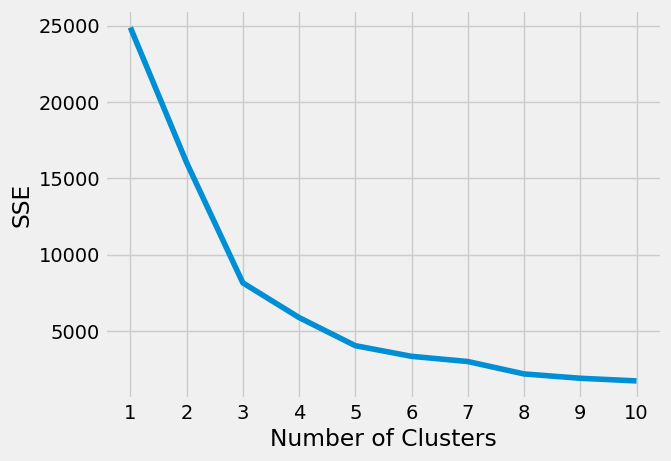

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [19]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [20]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

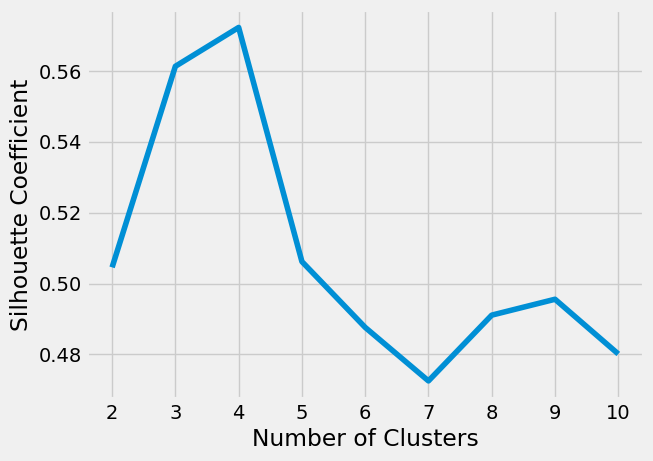

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/Users/da_learner_m1_19/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


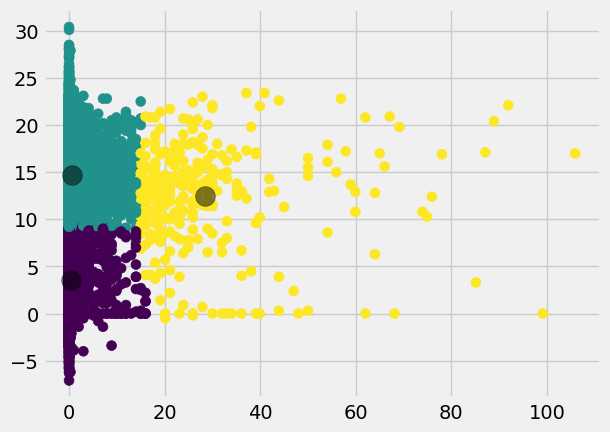

In [22]:

X = df.iloc[:,[6,9]].values
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

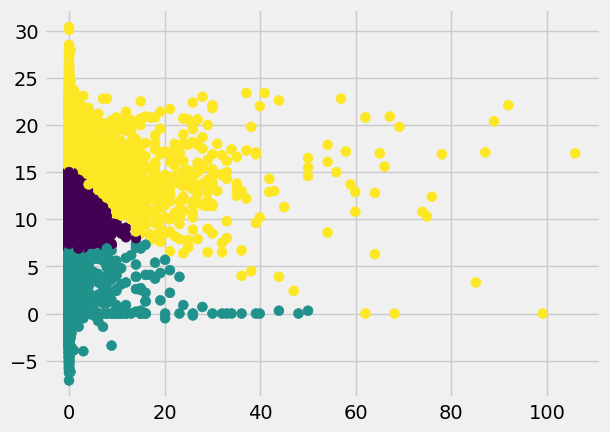

In [24]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


In [25]:
from sklearn.decomposition import PCA
X = df[['PRCP','TAVG','TMAX','TMIN']]
# Perform PCA on three components (age, income, and Score)
pca = PCA(n_components=3)
pca.fit(X)
df_pca = pd.DataFrame(pca.fit_transform(X))

Text(0, 0.5, 'Cumulative Explained Variance')

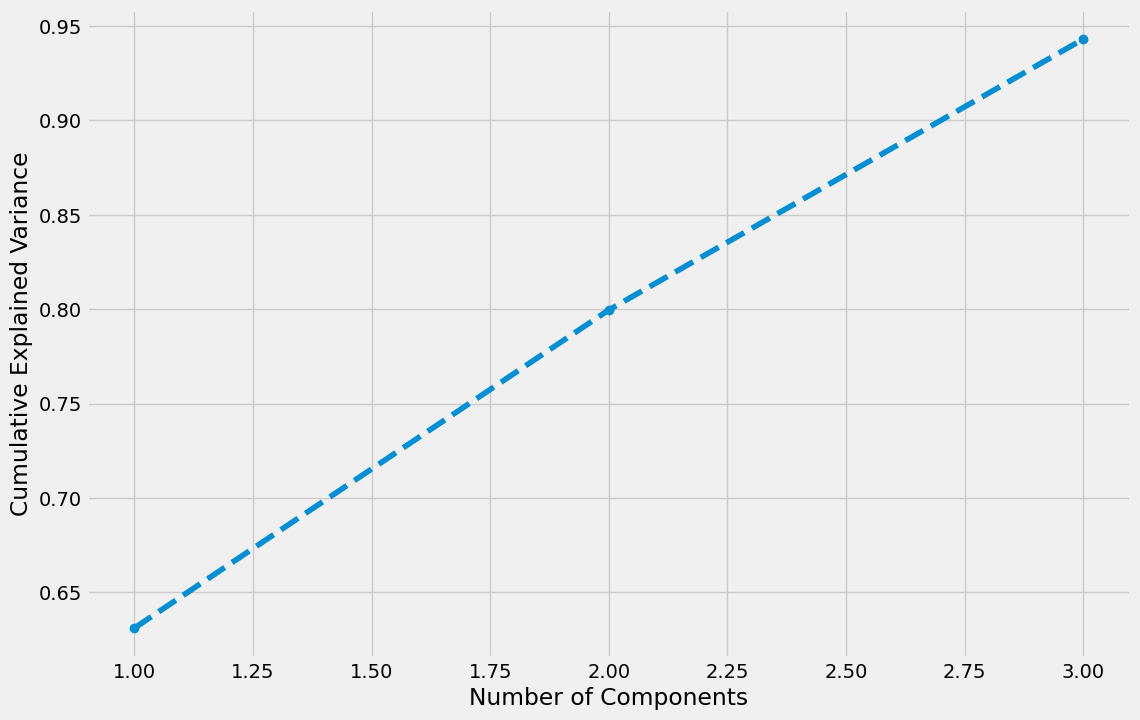

In [26]:

plt.figure(figsize=(12, 8))
plt.plot(range(1, 4), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [27]:
pca = PCA(n_components=3)
pca.fit(X)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(3),
    columns=df[['PRCP','TAVG','TMAX','TMIN']].columns.values,
    index=['component 1', 'component 2', 'component 3'])

df_pca_components

PRCP   TAVG   TMAX   TMIN
component 1  0.028 -0.405 -0.788 -0.463
component 2  0.797  0.195 -0.341  0.458
component 3  0.588 -0.422  0.510 -0.464

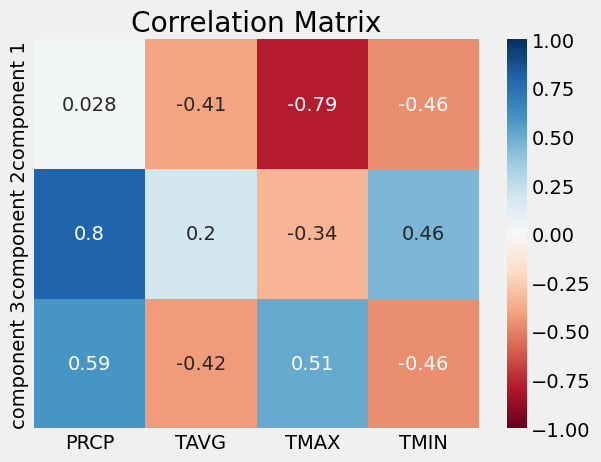

In [29]:
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

In [30]:
pca_scores = pca.transform(X)

results = {}

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   # pca_scores are standarzied by default
    results[i] = kmeans_pca.inertia_


/Users/da_learner_m1_19/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/da_learner_m1_19/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/da_learner_m1_19/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/da_learner_m1_19/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

In [31]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

/Users/da_learner_m1_19/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [32]:
df_segm_pca = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-3:] = ['component 1', 'component 2','component 3']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

STATION                NAME  LATITUDE  LONGITUDE  ELEVATION  \
0      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
1      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
2      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
3      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
4      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
...            ...                 ...       ...        ...        ...   
12439  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12440  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12441  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12442  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12443  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   

             DATE  PRCP  TAVG  TMAX  TMIN  component 1  component 2  \
0      2022-07-01   0.0   8.8  16.0  -1.7    16.671065    -5.522203   
1      2022-07-02   0.0  11.1  17.4   3.5    12.228508    -3.169054   
2      2022-07-03   0.0  11.6  18.3   6.8     9.788450    -1.866584   
3      2022-07-04   0.0   9.3  19.0   0.8    12.946813    -5.303110   
4      2022-07-05   0.0  10.4  19.0   7.3     9.490902    -2.110142   
...           ...   ...   ...   ...   ...          ...          ...   
12439  2023-04-08   0.0  14.2  21.0  12.2     4.107478     0.192944   
12440  2023-04-09   0.0  14.3  18.5  11.1     6.546459     0.561636   
12441  2023-04-10   0.0  14.9  18.7  12.5     5.497579     1.251817   
12442  2023-04-11   0.0  14.6  18.7  11.1     6.267456     0.551813   
12443  2023-04-12   0.0  14.8  18.5  11.6     6.112516     0.888167   

       component 3  K-means PCA  
0         4.472508            1  
1         1.802703            1  
2         0.519054            1  
3         4.631804            1  
4         1.150276            1  
...            ...          ...  
12439    -1.706795            1  
12440    -2.513971            1  
12441    -3.314931            1  
12442    -2.538457            1  
12443    -2.956989            1  

[12444 rows x 14 columns]

In [33]:
df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

/var/folders/tb/8jtl7dld4457h7t9rl26pyx80000gn/T/ipykernel_13809/1696682257.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)


LATITUDE  LONGITUDE  ELEVATION     PRCP     TAVG     TMAX  \
K-means PCA                                                              
0            -30.0800    25.1350   810.2571   0.5350  22.0936  30.7469   
1            -31.4222    24.8610   847.3018   0.6221  13.5887  21.9170   
2            -33.4153    28.2252   305.9272   0.8094  16.2382   1.8374   
3            -31.3162    28.0846   762.5619  27.9962  17.0143  23.0854   

                TMIN  component 1  component 2  component 3  
K-means PCA                                                  
0            14.9543      -8.0283       0.0926      -1.0267  
1             5.8437       6.5938      -2.6561       2.3358  
2             4.8777      21.7964       4.4203      -8.4690  
3            12.5721       1.9307      22.5189      14.4702

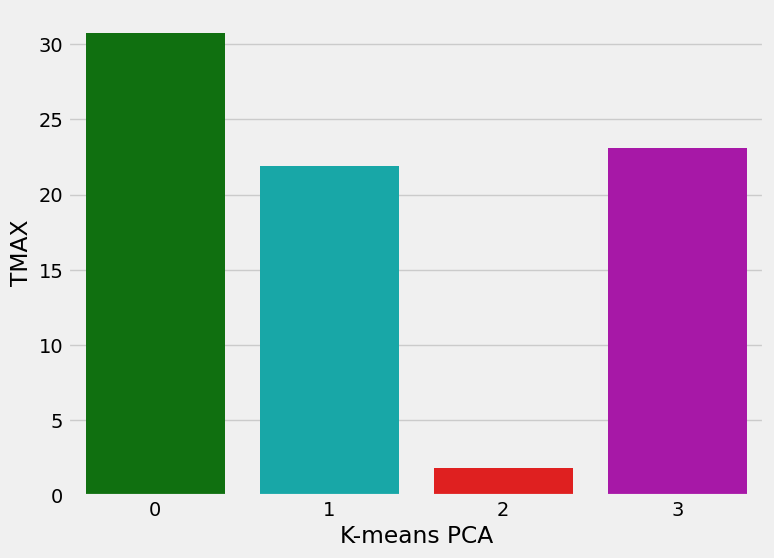

In [34]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='TMAX', palette=['g','c','r','m','b'])


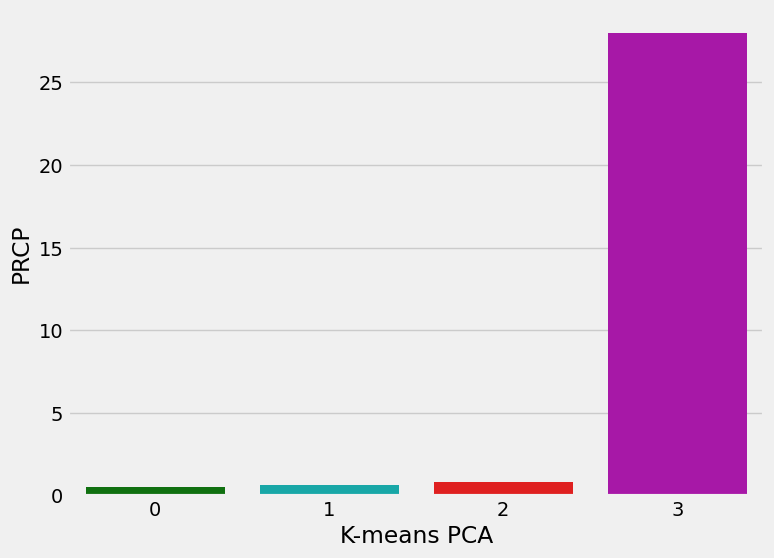

In [35]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='PRCP', palette=['g','c','r','m','b'])

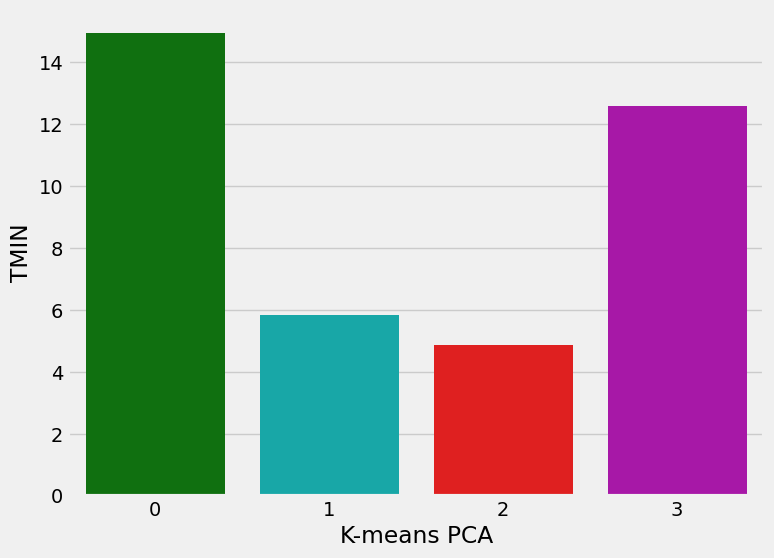

In [36]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='TMIN', palette=['g','c','r','m','b'])


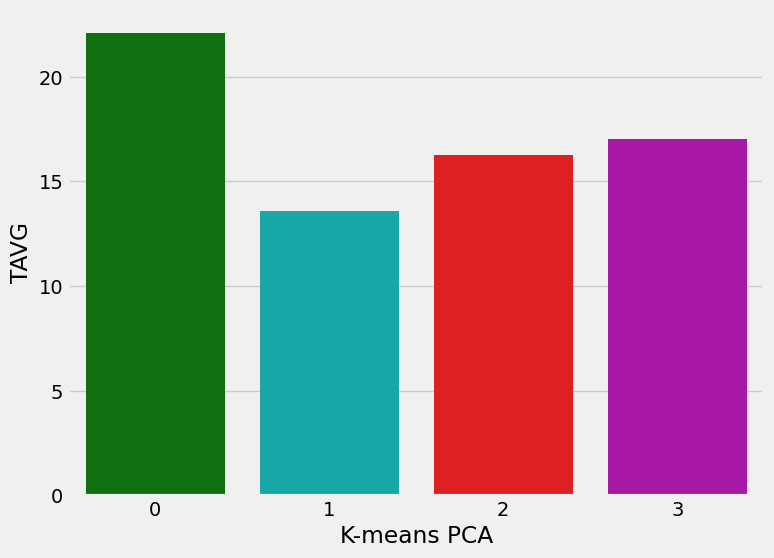

In [37]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='TAVG', palette=['g','c','r','m','b'])


In [38]:
df_segm_pca['Segment'] = df_segm_pca['K-means PCA'].map({
    0: 'Solar',
    1: 'Wind',
    2: 'Hydro',

})
df_segm_pca

STATION                NAME  LATITUDE  LONGITUDE  ELEVATION  \
0      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
1      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
2      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
3      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
4      SF001447910        NOUPOORT, SF   -31.183      24.95     1496.0   
...            ...                 ...       ...        ...        ...   
12439  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12440  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12441  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12442  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   
12443  SF000068712  CAPE COLUMBINE, SF   -32.833      17.85       67.0   

             DATE  PRCP  TAVG  TMAX  TMIN  component 1  component 2  \
0      2022-07-01   0.0   8.8  16.0  -1.7    16.671065    -5.522203   
1      2022-07-02   0.0  11.1  17.4   3.5    12.228508    -3.169054   
2      2022-07-03   0.0  11.6  18.3   6.8     9.788450    -1.866584   
3      2022-07-04   0.0   9.3  19.0   0.8    12.946813    -5.303110   
4      2022-07-05   0.0  10.4  19.0   7.3     9.490902    -2.110142   
...           ...   ...   ...   ...   ...          ...          ...   
12439  2023-04-08   0.0  14.2  21.0  12.2     4.107478     0.192944   
12440  2023-04-09   0.0  14.3  18.5  11.1     6.546459     0.561636   
12441  2023-04-10   0.0  14.9  18.7  12.5     5.497579     1.251817   
12442  2023-04-11   0.0  14.6  18.7  11.1     6.267456     0.551813   
12443  2023-04-12   0.0  14.8  18.5  11.6     6.112516     0.888167   

       component 3  K-means PCA Segment  
0         4.472508            1    Wind  
1         1.802703            1    Wind  
2         0.519054            1    Wind  
3         4.631804            1    Wind  
4         1.150276            1    Wind  
...            ...          ...     ...  
12439    -1.706795            1    Wind  
12440    -2.513971            1    Wind  
12441    -3.314931            1    Wind  
12442    -2.538457            1    Wind  
12443    -2.956989            1    Wind  

[12444 rows x 15 columns]

<Axes: xlabel='Segment', ylabel='count'>

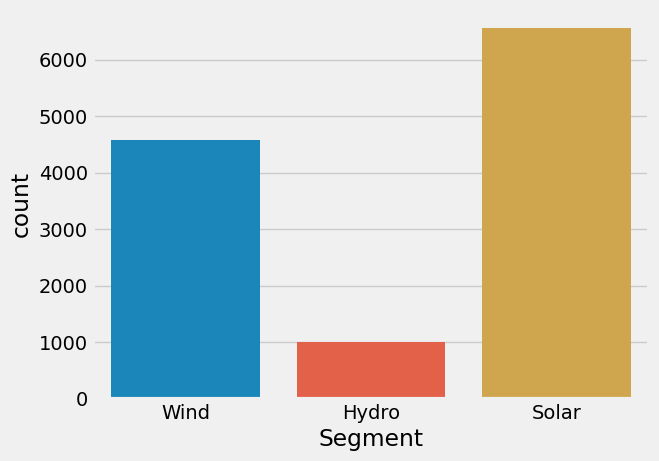

In [39]:
import seaborn as sns 

sns.countplot(data=df_segm_pca,x='Segment')


In [40]:
from sklearn.utils import resample

df_minority1 = df_segm_pca[df_segm_pca.Segment=='Wind']
df_minority2 = df_segm_pca[df_segm_pca.Segment=='Hydro']

df_majority1 = df_segm_pca[df_segm_pca.Segment=='Solar']

df_majority_downsampled = resample(df_majority1, 
                                 replace=False,
                                 n_samples=6000,
                                 random_state=123) 

df_minority_up = resample(df_minority1, 
                        replace=True,
                        n_samples=6000,
                        random_state=123) 

df_minority_up1 = resample(df_minority2, 
                        replace=True,
                        n_samples=6000,
                        random_state=123) 
df_resampled = pd.concat([df_majority_downsampled,df_minority_up,df_minority_up1])
df_resampled


STATION                                  NAME  LATITUDE  LONGITUDE  \
10872  SF003211100                       POSTMASBURG, SF   -28.333     23.067   
5903   SFM00068588              DURBAN INTERNATIONAL, SF   -29.970     30.951   
2948   SF002146700                         SPRINGBOK, SF   -29.667     17.900   
10438  SF003605120                             TAUNG, SF   -27.550     24.767   
9263   SF004371040                     POTCHEFSTROOM, SF   -26.733     27.067   
...            ...                                   ...       ...        ...   
1641   SFM00068592  KING SHAKA INTERNATIONAL AIRPORT, SF   -29.617     31.133   
1735   SFM00068592  KING SHAKA INTERNATIONAL AIRPORT, SF   -29.617     31.133   
7677   SF000288380                    GEORGE AIRPORT, SF   -34.017     22.383   
4293   SF001506200                            ELLIOT, SF   -31.333     27.850   
3360   SFM00068816           CAPE TOWN INTERNATIONAL, SF   -33.965     18.602   

       ELEVATION        DATE  PRCP  TAVG  TMAX  TMIN  component 1  \
10872     1321.0  2023-04-07   0.0  22.4  31.6  15.1    -8.906798   
5903        10.1  2023-02-14   1.0  26.6  31.1  23.7   -14.168191   
2948      1007.0  2022-10-08   0.0  26.1  34.1  20.2   -14.736379   
10438     1100.0  2022-10-17   5.1  20.6  24.6  15.5    -2.706121   
9263      1351.0  2022-12-29   3.0  21.8  27.1  17.4    -6.100094   
...          ...         ...   ...   ...   ...   ...          ...   
1641       127.0  2022-12-01   0.0  22.5   0.0   0.0    22.946955   
1735       127.0  2023-03-05   0.0  25.4   0.0   0.0    21.773346   
7677       190.0  2022-12-08   0.0  18.8   0.0   0.0    24.444318   
4293      1463.0  2022-12-25   9.9  11.6   0.0  10.6    22.723293   
3360        46.0  2022-07-27   0.0  13.4   0.0   5.4    24.128421   

       component 2  component 3  K-means PCA Segment  
10872    -0.498695    -1.103023            0   Solar  
5903      5.228383    -6.533767            0   Solar  
2948      1.705903    -3.755630            0   Solar  
10438     5.788990    -1.100552            0   Solar  
9263      4.365998    -2.448717            0   Solar  
...            ...          ...          ...     ...  
1641      3.386746   -10.259534            2   Hydro  
1735      3.951677   -11.482744            2   Hydro  
7677      2.665973    -8.698886            2   Hydro  
4293     14.013362    -4.757839            2   Hydro  
3360      4.088633    -8.928074            2   Hydro  

[18000 rows x 15 columns]

<Axes: xlabel='Segment', ylabel='count'>

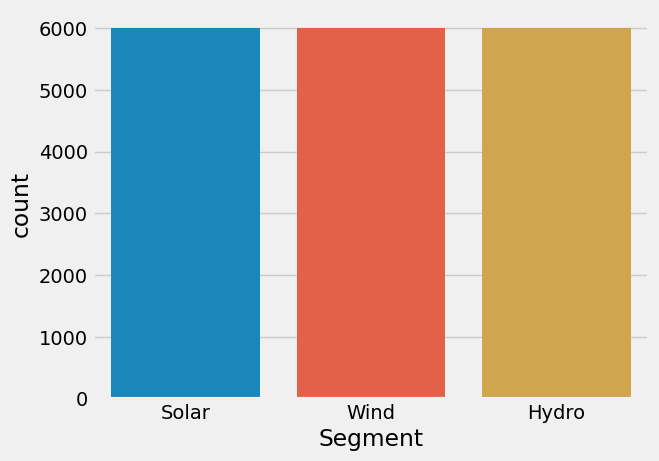

In [41]:
import seaborn as sns 

sns.countplot(data=df_resampled,x='Segment')


In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the weather station data into a pandas DataFrame
weather_data = df_resampled
# Separate the features (weather data) and target (energy solution) variables
X = weather_data.iloc[:, 7:13]  # select columns 6-9 as features
y = weather_data['Segment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Train and test the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_score = dtc.score(X_test, y_test)
print('Decision Tree Classifier score:', dtc_score)

# Train and test the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test, y_test)
print('Random Forest Classifier score:', rfc_score)

# Train and test the support vector machine classifier
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print('Support Vector Machine Classifier score:', svm_score)

# Train and test the artificial neural network classifier
ann = MLPClassifier()
ann.fit(X_train, y_train)
ann_score = ann.score(X_test, y_test)
print('Artificial Neural Network Classifier score:', ann_score)

# Train and test the K-nearest neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print('K-Nearest Neighbors Classifier score:', knn_score)


Decision Tree Classifier score: 0.997037037037037
Random Forest Classifier score: 0.9985185185185185
Support Vector Machine Classifier score: 0.9938888888888889
Artificial Neural Network Classifier score: 0.9981481481481481
K-Nearest Neighbors Classifier score: 0.992037037037037


In [43]:
from sklearn.metrics import classification_report


# Train and test the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_report = classification_report(y_test, dtc_pred)
print('Decision Tree Classifier report:\n', dtc_report)

# Train and test the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_report = classification_report(y_test, rfc_pred)
print('Random Forest Classifier report:\n', rfc_report)

# Train and test the support vector machine classifier
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_report = classification_report(y_test, svm_pred)
print('Support Vector Machine Classifier report:\n', svm_report)

# Train and test the artificial neural network classifier
ann = MLPClassifier()
ann.fit(X_train, y_train)
ann_pred = ann.predict(X_test)
ann_report = classification_report(y_test, ann_pred)
print('Artificial Neural Network Classifier report:\n', ann_report)

# Train and test the K-nearest neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_report = classification_report(y_test, knn_pred)
print('K-Nearest Neighbors Classifier report:\n', knn_report)


Decision Tree Classifier report:
               precision    recall  f1-score   support

       Hydro       1.00      1.00      1.00      1798
       Solar       1.00      0.99      1.00      1782
        Wind       1.00      1.00      1.00      1820

    accuracy                           1.00      5400
   macro avg       1.00      1.00      1.00      5400
weighted avg       1.00      1.00      1.00      5400

Random Forest Classifier report:
               precision    recall  f1-score   support

       Hydro       1.00      1.00      1.00      1798
       Solar       1.00      1.00      1.00      1782
        Wind       1.00      1.00      1.00      1820

    accuracy                           1.00      5400
   macro avg       1.00      1.00      1.00      5400
weighted avg       1.00      1.00      1.00      5400

Support Vector Machine Classifier report:
               precision    recall  f1-score   support

       Hydro       0.99      1.00      1.00      1798
       Solar      

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [45]:
X = df[['PRCP','TAVG','TMAX','TMIN']]
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)
df_scale = pd.DataFrame(X_scale, columns=['PRCP','TAVG','TMAX','TMIN'])
df_scale.head()

PRCP      TAVG      TMAX      TMIN
0 -0.239187 -1.717181 -0.992997 -1.955068
1 -0.239187 -1.304451 -0.838148 -1.137521
2 -0.239187 -1.214727 -0.738602 -0.618692
3 -0.239187 -1.627457 -0.661178 -1.562017
4 -0.239187 -1.430065 -0.661178 -0.540082

Text(0, 0.5, 'Inertia')

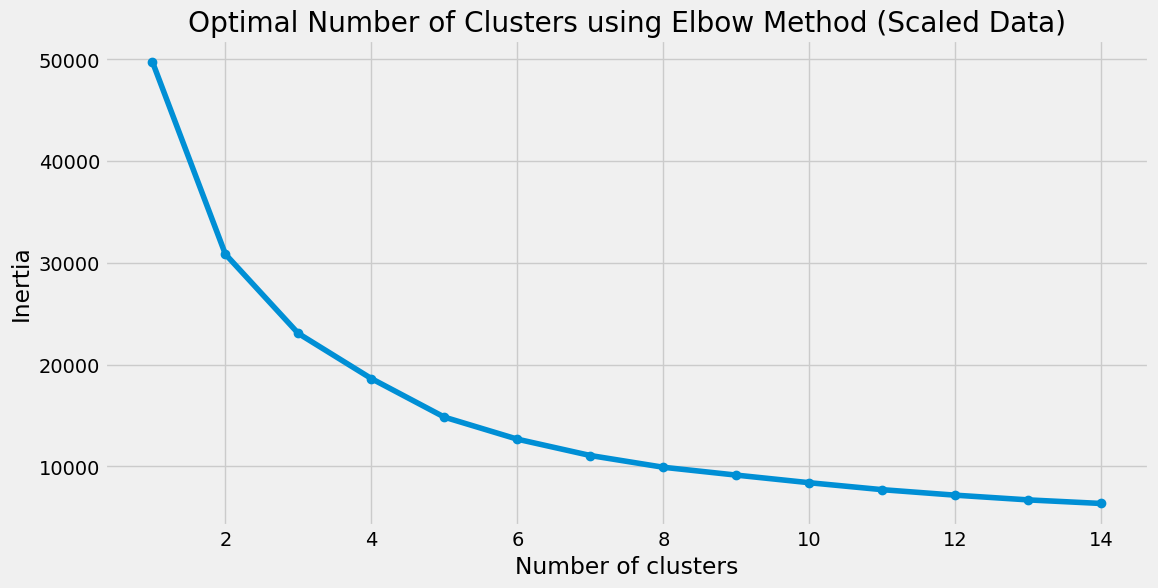

In [46]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [47]:
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.4394106827416035


In [ ]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

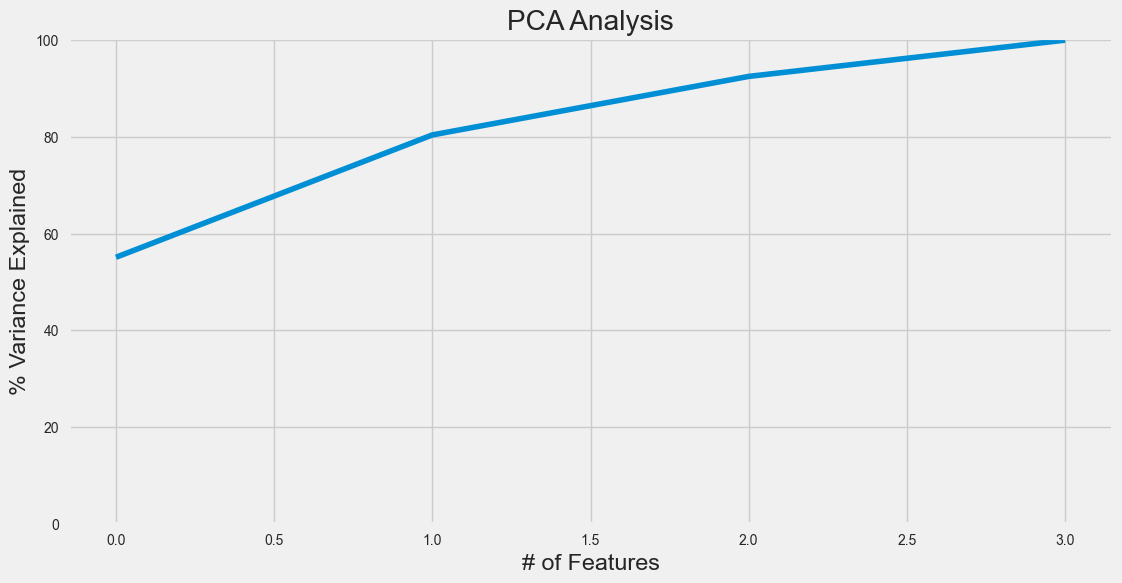

In [ ]:
pca = PCA(n_components=4)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [ ]:
pca = PCA(n_components=3)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3'])
print(pca.explained_variance_ratio_)

[0.55128717 0.25321014 0.12085447]


In [ ]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.3669340227495


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 12444 samples in 0.002s...
[t-SNE] Computed neighbors for 12444 samples in 0.557s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12444
[t-SNE] Computed conditional probabilities for sample 2000 / 12444
[t-SNE] Computed conditional probabilities for sample 3000 / 12444
[t-SNE] Computed conditional probabilities for sample 4000 / 12444
[t-SNE] Computed conditional probabilities for sample 5000 / 12444
[t-SNE] Computed conditional probabilities for sample 6000 / 12444
[t-SNE] Computed conditional probabilities for sample 7000 / 12444
[t-SNE] Computed conditional probabilities for sample 8000 / 12444
[t-SNE] Computed conditional probabilities for sample 9000 / 12444
[t-SNE] Computed conditional probabilities for sample 10000 / 12444
[t-SNE] Computed conditional probabilities for sample 11000 / 12444
[t-SNE] Computed conditional probabilities for sample 12000 / 12444
[t-SNE] Computed conditional probabilities for sa

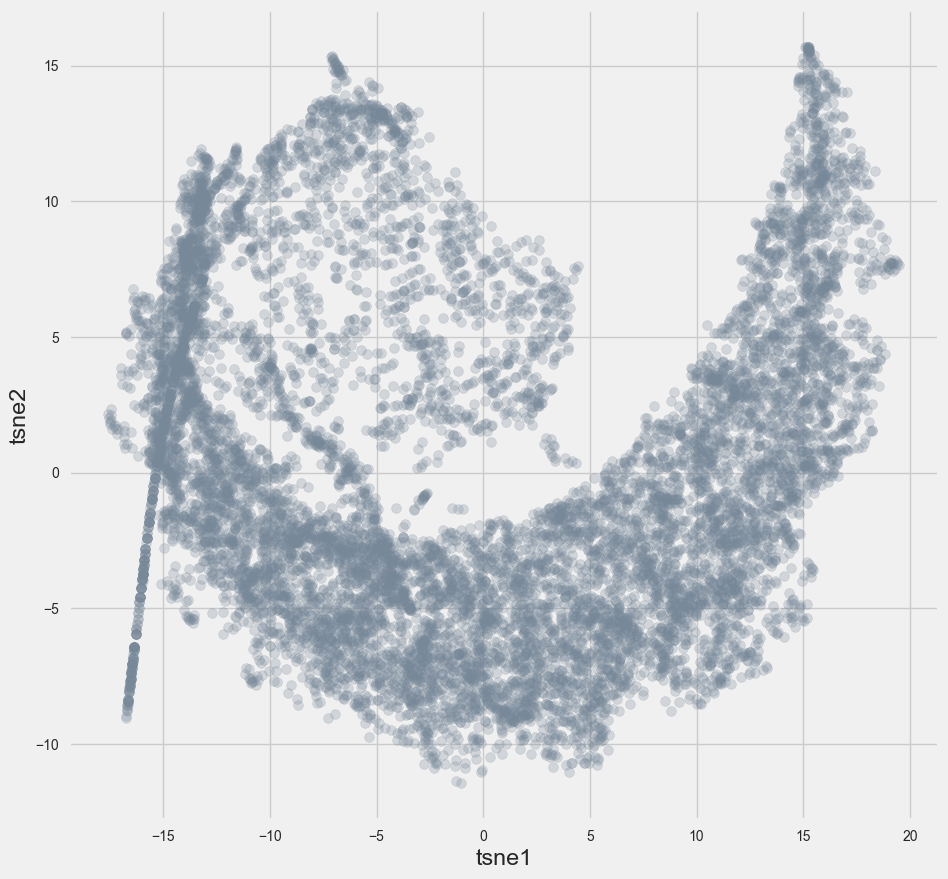

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Text(0, 0.5, 'Inertia')

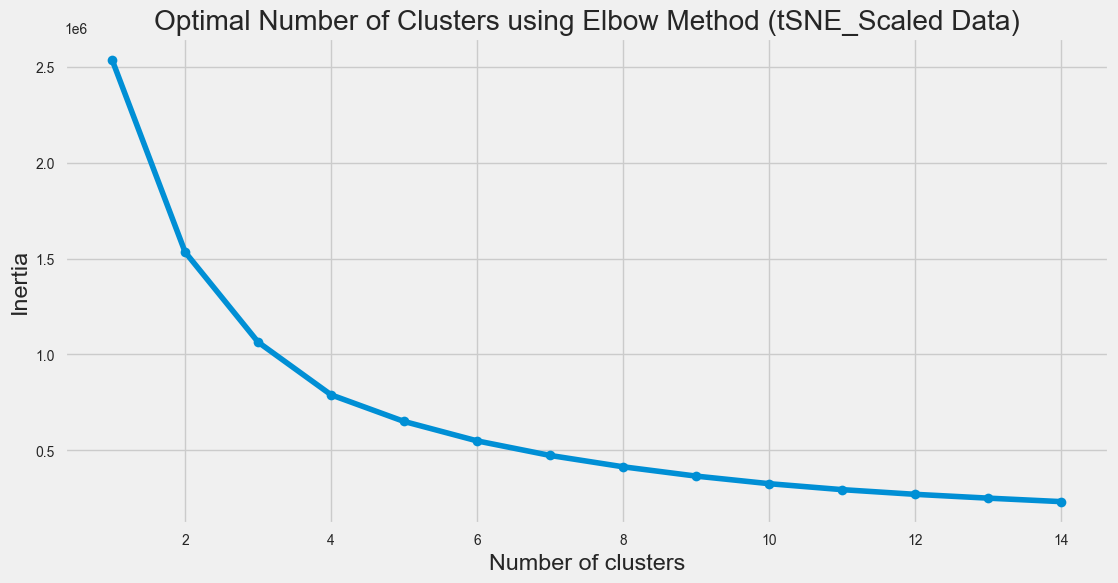

In [ ]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.3641442060470581


In [ ]:
Scene = dict(xaxis = dict(title  = 'tsne1'),yaxis = dict(title  = 'tsne2'),zaxis = dict(title  = 'tsne3'))
labels = labels_tsne_scale
trace = go.Scatter3d(x=clusters_tsne_scale.iloc[:,0], y=clusters_tsne_scale.iloc[:,1], z=clusters_tsne_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

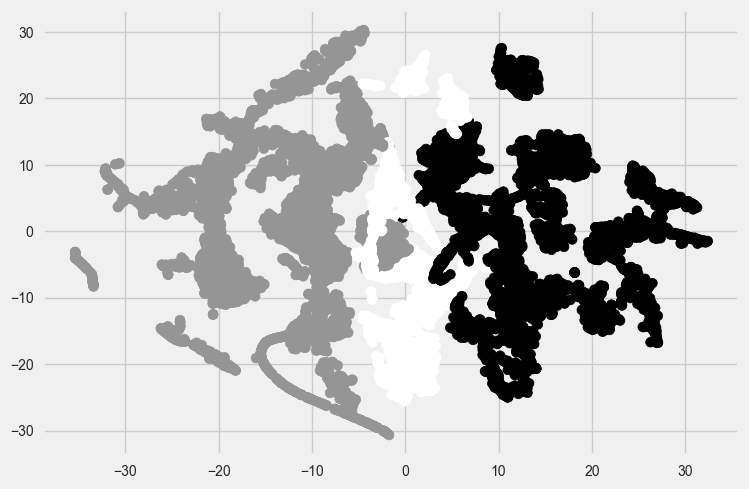

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Run t-SNE
X = df.drop(['STATION', 'NAME', 'DATE'], axis=1)
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.show()

In [ ]:
 # Run KMeans clustering
X = df.drop(['STATION', 'NAME', 'DATE'], axis=1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Add the cluster labels as a new column
df['Cluster'] = labels


In [ ]:
df.max()

STATION           SFM00068842
NAME            WORCESTER, SF
LATITUDE              -24.983
LONGITUDE              37.867
ELEVATION              1819.0
DATE               2023-04-12
PRCP                    105.9
TAVG                     35.9
TMAX                     46.9
TMIN                     30.4
Cluster                     2
Power Source             wind
dtype: object

In [ ]:
df.mean()

LATITUDE     -30.873279
LONGITUDE     25.358400
ELEVATION    781.964167
PRCP           1.284249
TAVG          18.369254
TMAX          24.977764
TMIN          10.735182
Cluster        1.181373
dtype: float64

In [ ]:
# Select the numerical columns for clustering
X = df[['PRCP', 'TAVG', 'TMAX', 'TMIN']]

# Create the KMeans object
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to the data
kmeans.fit(X)

# Add the cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Map the cluster labels to the power source names based on domain knowledge
def map_clusters(row):
    if row['Cluster'] == 0 and row['PRCP'] < 2:
        return 'hydro'
    elif row['Cluster'] == 1 and row['TMAX'] > 25:
        return 'solar'
    else:
        return 'wind'

df['Power Source'] = df.apply(map_clusters, axis=1)
df.groupby('Power Source').mean()

LATITUDE  LONGITUDE   ELEVATION      PRCP       TAVG  \
Power Source                                                          
hydro        -31.511295  24.826956  845.186917  0.075695  13.263257   
solar        -29.979112  25.100544  839.975416  1.030816  22.201366   
wind         -32.401096  27.207470  476.884555  4.452590  16.490665   

                   TMAX       TMIN   Cluster  
Power Source                                  
hydro         21.675223   5.465541  0.000000  
solar         31.184474  14.735228  1.000000  
wind          12.155621   8.655914  1.138807

<Axes: xlabel='Power Source', ylabel='count'>

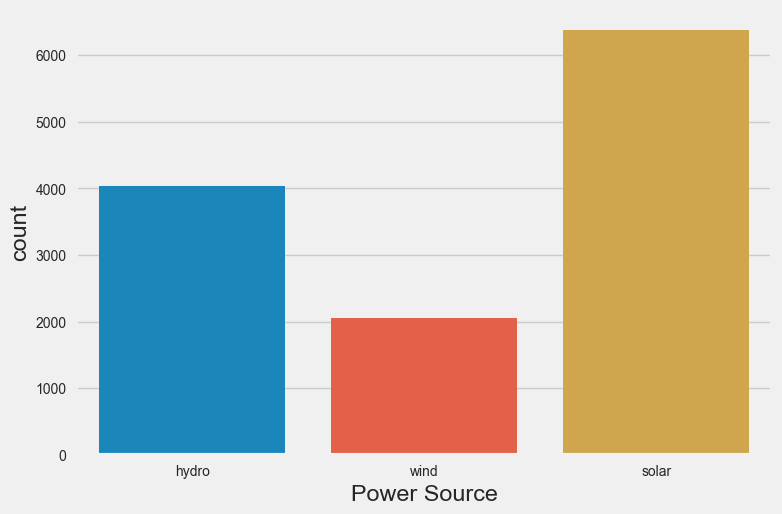

In [ ]:
 import seaborn as sns 

sns.countplot(data=df,x='Power Source')


In [ ]:
from sklearn.utils import resample

df_minority1 = df[df['Power Source']=='wind']
df_minority2 = df[df['Power Source']=='hydro']

df_majority1 = df[df['Power Source']=='solar']

df_majority_downsampled = resample(df_majority1, 
                                 replace=False,
                                 n_samples=5000,
                                 random_state=123) 

df_minority_up = resample(df_minority1, 
                        replace=True,
                        n_samples=5000,
                        random_state=123) 

df_minority_up1 = resample(df_minority2, 
                        replace=True,
                        n_samples=5000,
                        random_state=123) 
df_resampled = pd.concat([df_majority_downsampled,df_minority_up,df_minority_up1])
df_resampled


STATION             NAME  LATITUDE  LONGITUDE  ELEVATION  \
7509   SF004722810  LICHTENBURG, SF   -26.133     26.167     1487.0   
3324   SF004322370      VRYBURG, SF   -26.950     24.633     1234.0   
9869   SF000104560   RIVERSDALE, SF   -34.083     21.250      116.0   
12078  SF000068438    KIMBERLEY, SF   -28.800     24.767     1196.0   
10491  SF003605120        TAUNG, SF   -27.550     24.767     1100.0   
...            ...              ...       ...        ...        ...   
9940   SF000104560   RIVERSDALE, SF   -34.083     21.250      116.0   
1107   SF003724960      VRYHEID, SF   -27.783     30.800     1163.0   
1258   SFM00068591      MARGATE, SF   -30.850     30.333      154.0   
9652   SF004348880     OTTOSDAL, SF   -26.817     26.017     1500.0   
8115   SF003336820   VAN REENEN, SF   -28.367     29.383     1680.0   

             DATE  PRCP  TAVG  TMAX  TMIN  Cluster Power Source  
7509   2023-03-29   0.0  20.7  26.5  12.0        1        solar  
3324   2023-03-31   0.3  19.1  27.7  11.6        1        solar  
9869   2022-07-09   0.0  19.8  29.9   6.8        1        solar  
12078  2022-11-27   0.0  21.8  31.0  10.6        1        solar  
10491  2022-12-10   0.0  21.4  31.0  13.7        1        solar  
...           ...   ...   ...   ...   ...      ...          ...  
9940   2022-09-18   0.0  12.2  14.3  10.1        0        hydro  
1107   2022-12-26   0.0  16.9  19.7  14.0        0        hydro  
1258   2022-08-16   0.0  16.3  21.8  11.1        0        hydro  
9652   2022-08-03   0.0  10.3  19.4   9.2        0        hydro  
8115   2022-08-28   0.0  14.9  26.0   0.7        0        hydro  

[15000 rows x 12 columns]

<Axes: xlabel='Power Source', ylabel='count'>

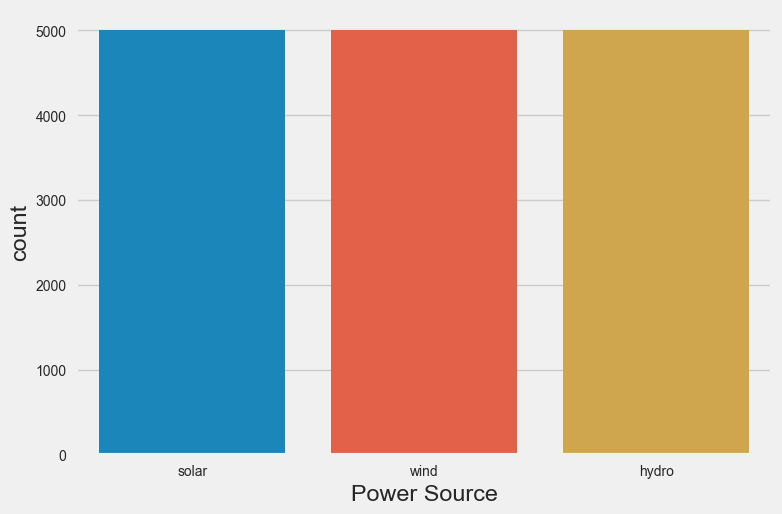

In [ ]:
import seaborn as sns 

sns.countplot(data=df_resampled,x='Power Source')


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the weather station data into a pandas DataFrame
weather_data = df_resampled
# Separate the features (weather data) and target (energy solution) variables
X = weather_data.iloc[:, 7:10]  # select columns 6-9 as features
y = weather_data['Power Source']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Train and test the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_score = dtc.score(X_test, y_test)
print('Decision Tree Classifier score:', dtc_score)

# Train and test the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test, y_test)
print('Random Forest Classifier score:', rfc_score)

# Train and test the support vector machine classifier
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print('Support Vector Machine Classifier score:', svm_score)

# Train and test the artificial neural network classifier
ann = MLPClassifier()
ann.fit(X_train, y_train)
ann_score = ann.score(X_test, y_test)
print('Artificial Neural Network Classifier score:', ann_score)

# Train and test the K-nearest neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print('K-Nearest Neighbors Classifier score:', knn_score)


Decision Tree Classifier score: 0.9615555555555556
Random Forest Classifier score: 0.9702222222222222
Support Vector Machine Classifier score: 0.8911111111111111
Artificial Neural Network Classifier score: 0.8968888888888888
K-Nearest Neighbors Classifier score: 0.9171111111111111


In [ ]:
from sklearn.metrics import classification_report


# Train and test the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_report = classification_report(y_test, dtc_pred)
print('Decision Tree Classifier report:\n', dtc_report)

# Train and test the random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_report = classification_report(y_test, rfc_pred)
print('Random Forest Classifier report:\n', rfc_report)

# Train and test the support vector machine classifier
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_report = classification_report(y_test, svm_pred)
print('Support Vector Machine Classifier report:\n', svm_report)

# Train and test the artificial neural network classifier
ann = MLPClassifier()
ann.fit(X_train, y_train)
ann_pred = ann.predict(X_test)
ann_report = classification_report(y_test, ann_pred)
print('Artificial Neural Network Classifier report:\n', ann_report)

# Train and test the K-nearest neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_report = classification_report(y_test, knn_pred)
print('K-Nearest Neighbors Classifier report:\n', knn_report)


Decision Tree Classifier report:
               precision    recall  f1-score   support

       hydro       0.97      0.91      0.94      1484
       solar       0.99      0.99      0.99      1524
        wind       0.92      0.97      0.95      1492

    accuracy                           0.96      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.96      0.96      0.96      4500

Random Forest Classifier report:
               precision    recall  f1-score   support

       hydro       0.97      0.95      0.96      1484
       solar       0.99      1.00      1.00      1524
        wind       0.95      0.97      0.96      1492

    accuracy                           0.97      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500

Support Vector Machine Classifier report:
               precision    recall  f1-score   support

       hydro       0.80      0.92      0.86      1484
       solar      